In [123]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt 
import numpy as np 

In [124]:
drivers = pd.read_csv('D:\Data_Science_Documents\Formula_one\data_files\drivers.csv')
driver_standings = pd.read_csv('D:\Data_Science_Documents\Formula_one\data_files\driver_standings.csv')
races =  pd.read_csv('D:\\Data_Science_Documents\\Formula_one\data_files\\races.csv')
teams = pd.read_csv('D:\Data_Science_Documents\Formula_one\data_files\constructors.csv')

Drivers Data Cleaning

In [125]:
drivers.drop(columns=['url', 'dob', 'nationality'], inplace=True)

Races Data Cleaning

In [126]:
races.drop(columns=['url', 'fp1_date', 'fp1_time', 'fp1_date','fp1_time','fp2_date','fp2_time','fp3_date','fp3_time','quali_date','quali_time','sprint_date','sprint_time'], inplace=True)

All 2022 Races

In [127]:
races = races[races['year'] == 2022]

Driver standings for only the races in 2022

In [128]:
driver_standings =  driver_standings[driver_standings['raceId'].isin(races['raceId'])]

replacing driver IDs with the names

In [129]:
driver_ids = driver_standings['driverId'].unique()

In [130]:
driver_ids

array([842, 830, 815, 807, 849, 846, 817, 848, 840, 854, 855,   4, 852,
       839, 822, 844, 832,   1, 847, 825,  20, 856], dtype=int64)

In [131]:
driver_names = drivers[drivers['driverId'].isin(driver_ids)].set_index('driverId')['code'].to_dict()

In [132]:
driver_standings['Name'] = driver_standings['driverId'].replace(driver_names)

Adding the race Name based on race id

In [133]:
race_names = races.set_index('raceId')['name'].to_dict()

In [134]:
driver_standings['Race Name'] = driver_standings['raceId'].replace(race_names)

In [135]:
driver_standings.reset_index(inplace=True)

In [136]:
driver_standings.sort_values(by='raceId')

,index,driverStandingsId,raceId,driverId,points,position,positionText,wins,Name,Race Name
0,33374,71395,1074,842,0.0,20,20,0,GAS,Bahrain Grand Prix
19,33434,71380,1074,825,10.0,5,5,0,MAG,Bahrain Grand Prix
18,33433,71379,1074,847,12.0,4,4,0,RUS,Bahrain Grand Prix
17,33432,71378,1074,1,15.0,3,3,0,HAM,Bahrain Grand Prix
16,33431,71377,1074,832,18.0,2,2,0,SAI,Bahrain Grand Prix
...,...,...,...,...,...,...,...,...,...,...
314,33729,71607,1089,832,187.0,5,5,1,SAI,Italian Grand Prix
313,33728,71606,1089,844,219.0,2,2,3,LEC,Italian Grand Prix
333,33748,71626,1089,20,20.0,13,13,0,VET,Italian Grand Prix
322,33737,71615,1089,855,6.0,17,17,0,ZHO,Italian Grand Prix


In [137]:
driver_teams = {
    'NOR' : 'darkorange', 
    'RIC' : 'darkorange', 
    'VER' : 'darkblue', 
    'PER' : 'darkblue', 
    'LEC' : 'red', 
    'SAI' : 'red',
    'RUS' : 'mediumaquamarine', 
    'HAM' : 'mediumaquamarine', 
    'MAG' : 'snow', 
    'MSC' : 'snow', 
    'ALB' : 'dodgerblue', 
    'LAT' : 'dodgerblue', 
    'DEV' : 'dodgerblue', 
    'GAS' : 'gray', 
    'TSU' : 'gray', 
    'ALO' : 'mediumblue', 
    'OCO' : 'mediumblue', 
    'HUL' : 'darkgreen',
    'VET' : 'darkgreen', 
    'STR' : 'darkgreen', 
    'BOT' : 'darkred',
    'ZHO' : 'darkred'}

In [138]:
driver_standings

,index,driverStandingsId,raceId,driverId,points,position,positionText,wins,Name,Race Name
0,33374,71395,1074,842,0.0,20,20,0,GAS,Bahrain Grand Prix
1,33375,71394,1074,830,0.0,19,19,0,VER,Bahrain Grand Prix
2,33376,71393,1074,815,0.0,18,18,0,PER,Bahrain Grand Prix
3,33377,71392,1074,807,0.0,17,17,0,HUL,Bahrain Grand Prix
4,33378,71391,1074,849,0.0,16,16,0,LAT,Bahrain Grand Prix
...,...,...,...,...,...,...,...,...,...,...
330,33745,71623,1089,815,210.0,3,3,1,PER,Italian Grand Prix
331,33746,71624,1089,830,335.0,1,1,11,VER,Italian Grand Prix
332,33747,71625,1089,842,22.0,11,11,0,GAS,Italian Grand Prix
333,33748,71626,1089,20,20.0,13,13,0,VET,Italian Grand Prix


In [139]:
driver_standings['Team'] = driver_standings['Name'].replace(driver_teams)

In [140]:
driver_standings

,index,driverStandingsId,raceId,driverId,points,position,positionText,wins,Name,Race Name,Team
0,33374,71395,1074,842,0.0,20,20,0,GAS,Bahrain Grand Prix,gray
1,33375,71394,1074,830,0.0,19,19,0,VER,Bahrain Grand Prix,darkblue
2,33376,71393,1074,815,0.0,18,18,0,PER,Bahrain Grand Prix,darkblue
3,33377,71392,1074,807,0.0,17,17,0,HUL,Bahrain Grand Prix,darkgreen
4,33378,71391,1074,849,0.0,16,16,0,LAT,Bahrain Grand Prix,dodgerblue
...,...,...,...,...,...,...,...,...,...,...,...
330,33745,71623,1089,815,210.0,3,3,1,PER,Italian Grand Prix,darkblue
331,33746,71624,1089,830,335.0,1,1,11,VER,Italian Grand Prix,darkblue
332,33747,71625,1089,842,22.0,11,11,0,GAS,Italian Grand Prix,gray
333,33748,71626,1089,20,20.0,13,13,0,VET,Italian Grand Prix,darkgreen


In [141]:
grouped = driver_standings.groupby(['Team','raceId'])

In [142]:
driver_teams = {
    'NOR' : 'darkorange', 
    'RIC' : 'darkorange', 
    'VER' : 'darkblue', 
    'PER' : 'darkblue', 
    'LEC' : 'red', 
    'SAI' : 'red',
    'RUS' : 'mediumaquamarine', 
    'HAM' : 'mediumaquamarine', 
    'MAG' : 'snow', 
    'MSC' : 'snow', 
    'ALB' : 'dodgerblue', 
    'LAT' : 'dodgerblue', 
    'DEV' : 'dodgerblue', 
    'GAS' : 'gray', 
    'TSU' : 'gray', 
    'ALO' : 'mediumblue', 
    'OCO' : 'mediumblue', 
    'HUL' : 'darkgreen',
    'VET' : 'darkgreen', 
    'STR' : 'darkgreen', 
    'BOT' : 'darkred',
    'ZHO' : 'darkred'}

In [143]:
driver_standings['Name']

0      GAS
1      VER
2      PER
3      HUL
4      LAT
      ... 
330    PER
331    VER
332    GAS
333    VET
334    DEV
Name: Name, Length: 335, dtype: object

c:\Users\sreno\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


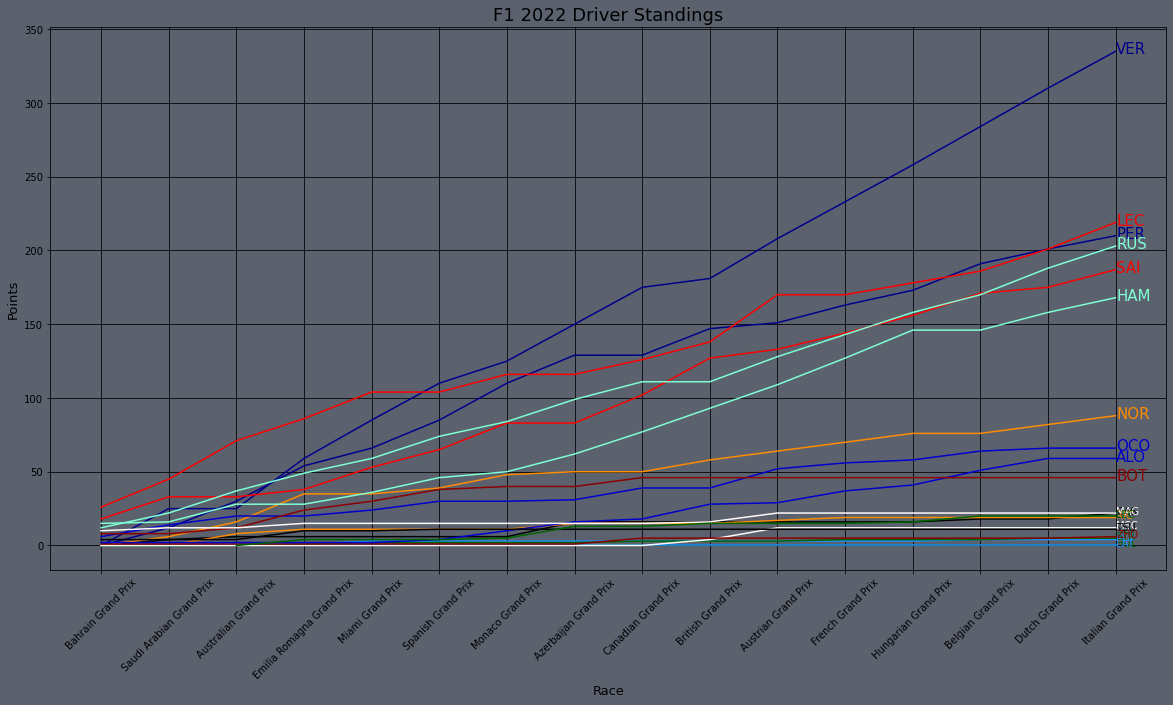

In [144]:

fig =  plt.figure( figsize=(20,10))

colors=['black', 'darkblue', 'darkblue', 'darkgreen', 'dodgerblue', 'darkorange','darkorange', 'dodgerblue','darkgreen','snow',
'darkred','mediumblue','black','mediumblue','darkred','red','red','aquamarine','aquamarine','snow','darkgreen','dodgerblue']

ax = sns.lineplot(driver_standings['Race Name'], driver_standings['points'],palette=colors,hue=driver_standings['Name'], markers='o')



fig.set_facecolor('#5b626e')
ax.set_facecolor('#5b626e')


plt.xticks(rotation=45)

legend = plt.legend(loc=(1, .42))
frame = legend.get_frame()
frame.set_facecolor('#5b626e')
frame.set_edgecolor('black')
plt.title('F1 2022 Driver Standings', fontsize=18)
plt.ylabel('Points', fontsize=13)
plt.xlabel('Race', fontsize=13)
plt.legend().set_visible(False)
x = 0
for line, name in zip(ax.lines, driver_standings['Name']):
    y = line.get_ydata()[-1]
    if y <= 45:
        ax.annotate(name, xy=(1,y), xytext=(-50,2), color=line.get_color(), 
                    xycoords = ax.get_yaxis_transform(), textcoords="offset points",
                    size=10, va="center")
    else:
        ax.annotate(name, xy=(1,y), xytext=(-50,2), color=line.get_color(), 
                    xycoords = ax.get_yaxis_transform(), textcoords="offset points",
                    size=15, va="center")
    x+=1
    if x >= 21:
        break



plt.grid(color ='black')
plt.show()

In [145]:
last_most_race = driver_standings['raceId'].unique()[-1]

In [146]:
driverids = driver_standings[(driver_standings['raceId'] == last_most_race) & (driver_standings['points'] <= 35)]['driverId']

In [147]:
driver_standings2 = driver_standings[driver_standings['driverId'].isin(driverids)]

In [154]:
driver_standings2[driver_standings2['raceId'] == last_most_race]

,index,driverStandingsId,raceId,driverId,points,position,positionText,wins,Name,Race Name,Team
317,33732,71610,1089,825,22.0,12,12,0,MAG,Italian Grand Prix,snow
320,33735,71613,1089,852,11.0,16,16,0,TSU,Italian Grand Prix,gray
322,33737,71615,1089,855,6.0,17,17,0,ZHO,Italian Grand Prix,darkred
323,33738,71616,1089,854,12.0,15,15,0,MSC,Italian Grand Prix,snow
324,33739,71617,1089,840,5.0,18,18,0,STR,Italian Grand Prix,darkgreen
325,33740,71618,1089,848,4.0,19,19,0,ALB,Italian Grand Prix,dodgerblue
326,33741,71619,1089,817,19.0,14,14,0,RIC,Italian Grand Prix,darkorange
328,33743,71621,1089,849,0.0,21,21,0,LAT,Italian Grand Prix,dodgerblue
329,33744,71622,1089,807,0.0,22,22,0,HUL,Italian Grand Prix,darkgreen
332,33747,71625,1089,842,22.0,11,11,0,GAS,Italian Grand Prix,gray


In [157]:
dev_add = {
    'driverStandingsId' : 00000,
    'raceId' : 1088,
    'driverId': 856,	
    'points':0,
    'position':22,
    'positionText' : '22',
    'wins' : 0,
    'Name'	: 'DEV', 
    'Race Name' : 'Dutch Grand Prix',
    'Team': 'dodgerblue'}

In [163]:
blank = pd.DataFrame(columns=driver_standings2.columns[0:])
blank.append(dev_add,ignore_index=True)

,index,driverStandingsId,raceId,driverId,points,position,positionText,wins,Name,Race Name,Team
0,NaN,0,1088,856,0,22,22,0,DEV,Dutch Grand Prix,dodgerblue


In [165]:
driver_standings2 = blank.append(driver_standings2, ignore_index=True)

c:\Users\sreno\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


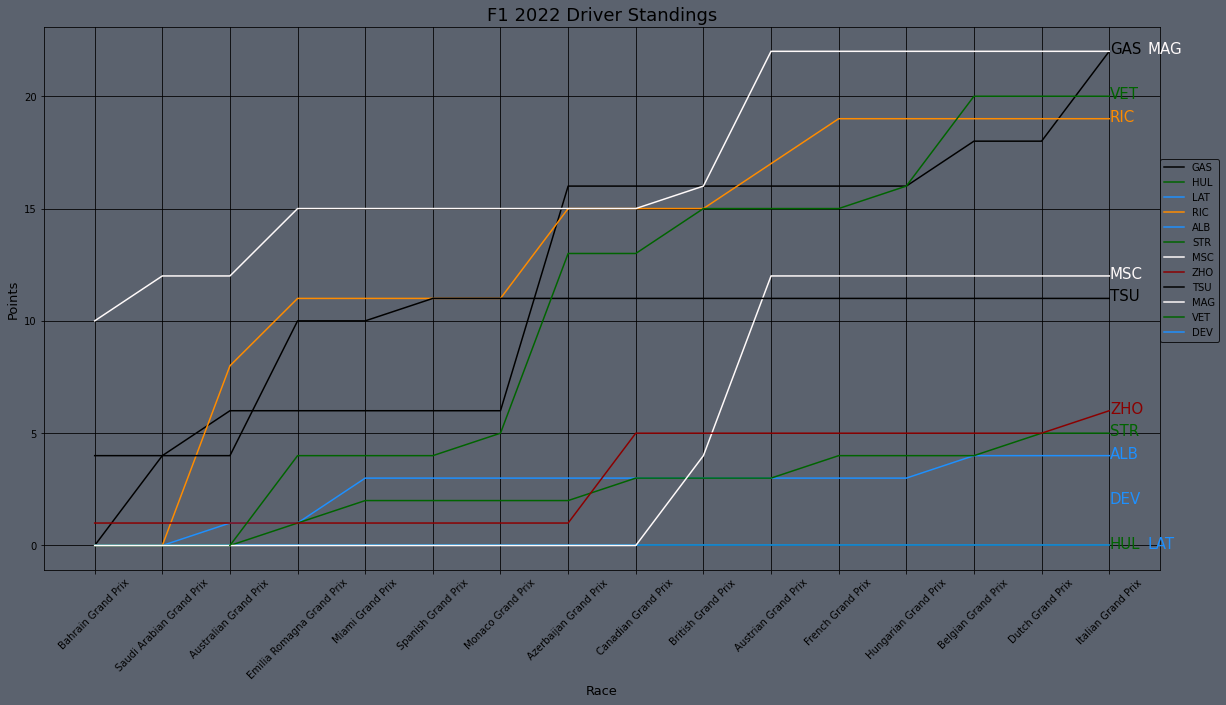

In [166]:

fig =  plt.figure( figsize=(20,10))

colors=['black', 'darkgreen', 'dodgerblue','darkorange', 'dodgerblue','darkgreen','snow',
'darkred','black','snow','darkgreen','dodgerblue']

ax = sns.lineplot(driver_standings2['Race Name'], driver_standings2['points'],palette=colors,hue=driver_standings2['Name'], markers='o')



fig.set_facecolor('#5b626e')
ax.set_facecolor('#5b626e')


plt.xticks(rotation=45)

legend = plt.legend(loc=(1, .42))
frame = legend.get_frame()
frame.set_facecolor('#5b626e')
frame.set_edgecolor('black')
plt.title('F1 2022 Driver Standings', fontsize=18)
plt.ylabel('Points', fontsize=13)
plt.xlabel('Race', fontsize=13)




x = 0
for line, name in zip(ax.lines, driver_standings2['Name']):
    #print(name)
    if name=='MAG' and x >9:
        name='VET'

    if name=='TSU' and x >10:
        name='DEV'

    y = line.get_ydata()[-1]
    if name == 'LAT':
        ax.annotate(name, xy=(1,y), xytext=(-12,2), color=line.get_color(), 
                xycoords = ax.get_yaxis_transform(), textcoords="offset points",
                size=15, va="center")
    if name == 'MAG':
        ax.annotate(name, xy=(1,y), xytext=(-12,2), color=line.get_color(), 
                xycoords = ax.get_yaxis_transform(), textcoords="offset points",
                size=15, va="center")
    if name != 'LAT' and name != 'MAG':
        ax.annotate(name, xy=(1,y), xytext=(-50,2), color=line.get_color(), 
                xycoords = ax.get_yaxis_transform(), textcoords="offset points",
                size=15, va="center")

    x+=1
    if x >= 12:
        break

#plt.legend().set_visible(False)
plt.grid(color ='black')
plt.show()